# WORK IN PROGRESS: My Nifty Notebook for Nice Scientific 'Nalysis

### Intent

This notebook is intended to capture all the lab notes and results as well as high-level assumptions, decisions, and conclusions associated with the phase 2 portion of our larger scientific study.  Please note that phase 2 was motivated by the results obtained in phase 1.  Refer to notebook `Analysis_Phase1.ipynb` for more information on this motivation as well as for understanding the phase 1 data used in this notebook.

The contents of this notebook will be frozen and protected before submitting our article to a journal and the contents of the repo will be tagged at the time of submission.

__NOTE__: The single plot that shows the results across all four systems studied will be included in the article.  As a result, the notebook has been designed to provide detailed context and metadata for the data used to create the figure.  In addition, it has been designed as a pipeline and should be run as such when generating the final version of the figure.  This notebook writes the graphic to the correct location and with the correct filename so that it is automatically rendered into the LaTeX article.  __THE NOTEBOOK OVERWRITES THE EXISTING VERSION WITHOUT WARNING__.

### Design

We will repeat identically the experiment as explained in `Analysis_Phase1.ipynb`.  The only difference is that the code has been altered on our study's branch to capture data at its finest level as opposed to just capturing the high-level summary statistics for each measurement.  This change is documented in Issue #123 in the code GitHub repo.

### Results
The summary statistics used in phase 1 have been computed in this notebook from the newly-acquired fine data.  The new summary statistics match those captured directly in phase 1, which suggests that the new data was acquired correctly.

The new data for each system was plotted in an identical way that is particularly illuminating.  A comparison of these visualizations indicate that the systems are significantly different.  Acquiring data at the finer level has allowed us to explore other summary statistics that we now know to be interesting.  In particular, we fit a linear model to each data set.

### Conclusions
ABC'S hunch that the phase 1 data was insufficient for assessing differences in system behavior is obviously confirmed here.  Indeed, it appears that the similarities are mere coincidence.

XYZ performed a literature search and has found [similar reports](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) of misleading analysis.  In fact, a comparison of our figure below against their's is astonishing!  You learn something new each day...

Based on these results, __it is inappropriate to assume that system 2 is linear__.

### **TODO**
* Assess if system 3 really is linear and if the single "bad" point really is an outlier.  If so,
  * repeat experiment?
  * filter out outlier?
  * use "robust" statistical methods?
* Ditto for system 4.  __Was this a human, measurement error?__
* Once this notebook is finalized, update Issue #123.  In the issue ask development team if the changes documented in Issue #123 should get into main.

## Setup & Start

In [1]:
%matplotlib inline

import os
import sys
import json
import scipy.stats

import numpy as np
import pandas as pd
import datetime as dt
import subprocess as sbp
import matplotlib.pyplot as plt

from pathlib import Path

import mytool

#####----- PATHS & FILENAMES
# Get path to root of study repo in both work and data clones
DATA_CLONE = Path(os.environ['MYSTUDY_DATA_CLONE']).resolve()
WORK_CLONE = Path(os.environ['MYSTUDY_WORK_CLONE']).resolve()

FNAME_ESTHETICS = DATA_CLONE.joinpath('esthetics.json')

LATEX_FIG_PATH = WORK_CLONE.joinpath('article', 'figures')
FNAME_FIG_TO_PUBLISH = LATEX_FIG_PATH.joinpath('TroublingQuartet.pdf')

# Developing this notebook with phase 2 data in my work clone.
#
# TODO: If this work isn't abandoned and the phase 2 data is added to the study's
# data clone, then replace below WORK_CLONE with DATA_CLONE, move the phase 2 data out
# of the work clone, rerun the notebook, & confirm correct results.  At that point,
# this notebook is finalized and can be set to read-only.
FNAME_REF   = DATA_CLONE.joinpath('phase1', 'mean_summary_statistics.csv')
FNAMES_NEW = [WORK_CLONE.joinpath('phase2', f'raw_data_{i}.csv') for i in range(1, 5)]

#####----- ESTHETICS
mlib = json.load(open(FNAME_ESTHETICS, 'r'))['matplotlib']

plt.style.use(mlib['style'])
FONTSIZE    = mlib['fontsize']
LINEWIDTH   = mlib['linewidth']
MARKERSIZE  = mlib['markersize']

#####----- HARDCODED VALUES
THRESHOLD = 3.0e-3
X_FIT = [3.0, 19.0]

#####----- LAB NOTES
print()
print(f'Execution started at {dt.datetime.utcnow()} UTC')
print()
print(f"MYSTUDY_DATA_CLONE\t{DATA_CLONE}")
print(f"MYSTUDY_WORK_CLONE\t{WORK_CLONE}")
print()
print(f'Using {sys.executable}')
print(f'python\t\t\t{sys.version}')
print()
print(f"Using ", end='')
sbp.run(['which', 'pip'])
sbp.run(['pip', 'list'])
print()
print('Test mytool package')
print('-' * 80)
sys.stdout.flush()
mytool.test()
sys.stdout.flush()


Execution started at 2022-07-29 15:50:17.079556 UTC

MYSTUDY_DATA_CLONE	/usr/local/DataClones/Tutorials/CompLabEnv
MYSTUDY_WORK_CLONE	/Users/jared/Documents/Tutorials/Tutorials/CompLabEnv

Using /Users/jared/Projects/venv/BSSW/bin/python3.9
python			3.9.9 (main, Nov 21 2021, 03:16:13) 
[Clang 13.0.0 (clang-1300.0.29.3)]

Using /Users/jared/Projects/venv/BSSW/bin/pip
Package              Version
-------------------- -----------
anyio                3.6.1
appnope              0.1.3
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
asttokens            2.0.5
attrs                22.1.0
Babel                2.10.3
backcall             0.2.0
beautifulsoup4       4.11.1
bleach               5.0.1
certifi              2022.6.15
cffi                 1.15.1
charset-normalizer   2.1.0
cycler               0.11.0
debugpy              1.6.2
decorator            5.1.1
defusedxml           0.7.1
entrypoints          0.4
executing            0.9.1
fastjsonschema       2.16.1
fonttools         

.......
----------------------------------------------------------------------
Ran 7 tests in 1.889s

OK


## Data Acquisition

#### 2022 July 25 - Monday
---------------------------
* Acquire phase 2 data on Bebop.
* We will follow exactly the lab notes from July 21 in `Analysis_Phase1.ipynb` and will omit most details here.
* Built binaries at __clean__ commit 5a4b3c4d in `MyStudy` branch in code repo.
* Study's lab env is from __clean__ commit in my study work clone (1d2c3b4a).
  * Intel 20.4/MPICH SW stack in production mode.
  * Build information written to `build_2022-07-25.log`
  * No warnings appeared in build log
  * Ran unit tests as in phase 1 to confirm correct binaries.  No issues found.
  * Confirmed that the output is now saved at the finer scale.
* Acquired data on Bebop
  * System 1 - Job ID 123
  * System 2 - Job ID 127
  * System 3 - Job ID 128
  * System 4 - Job ID 132
* Reviewed stderr for each job  and found no errors and normal walltimes.
* Reviewed stdout for each.  No warning messages found.  Ran as expected with nothing noteworthy.
-----------------------------


Load the mean of the summary statistics across all systems measured in phase 1.

In [2]:
stats_df = pd.read_csv(FNAME_REF, sep=',', header=0)
stats_df.index = ['ph1 means']

The summary statistics derived from the finer data measured in phase 2 should match reasonably well the phase 1 means and with each other.

In [3]:
df_all = [mytool.load_data(fname) for fname in FNAMES_NEW]

# Sanity check - same numbers of samples/system
for df in df_all:
    assert(len(df) == len(df_all[0]))

# Sanity check - fine data should be consistent with phase 1 results
for i, df in enumerate(df_all):
    stats_df.loc[f'ph2 sys {i+1}'] = [df.X.mean(), df.X.var(),
                                      df.Y.mean(), df.Y.var(),
                                      np.corrcoef(df.X, df.Y)[0, 1]]

display(stats_df)
diff_df = stats_df - stats_df.loc['ph1 means']
display(diff_df)
max_diff_df = diff_df.abs().max()
display(max_diff_df)

assert(all(diff_df.abs().max() <= THRESHOLD))

,x_mean,x_var,y_mean,y_var,corr
ph1 means,9.0,11.0,7.500000,4.125000,0.816000
ph2 sys 1,9.0,11.0,7.500909,4.127269,0.816421
ph2 sys 2,9.0,11.0,7.500909,4.127629,0.816237
ph2 sys 3,9.0,11.0,7.500000,4.122620,0.816287
ph2 sys 4,9.0,11.0,7.500909,4.123249,0.816521


,x_mean,x_var,y_mean,y_var,corr
ph1 means,0.0,0.0,0.000000,0.000000,0.000000
ph2 sys 1,0.0,0.0,0.000909,0.002269,0.000421
ph2 sys 2,0.0,0.0,0.000909,0.002629,0.000237
ph2 sys 3,0.0,0.0,0.000000,-0.002380,0.000287
ph2 sys 4,0.0,0.0,0.000909,-0.001751,0.000521


x_mean     0.000000
 x_var     0.000000
 y_mean    0.000909
 y_var     0.002629
 corr      0.000521
dtype: float64

## Data Analysis

In [4]:
N_sys = len(df_all)
fit_all  = np.full([N_sys, 2], np.finfo(float).min)
rsqr_all = np.full( N_sys,     np.finfo(float).min)
for i, df in enumerate(df_all):
    slope, intercept, r, _, _ = scipy.stats.linregress(df.X, df.Y)
    fit_all[i, :] = (slope, intercept)
    rsqr_all[i] = r**2

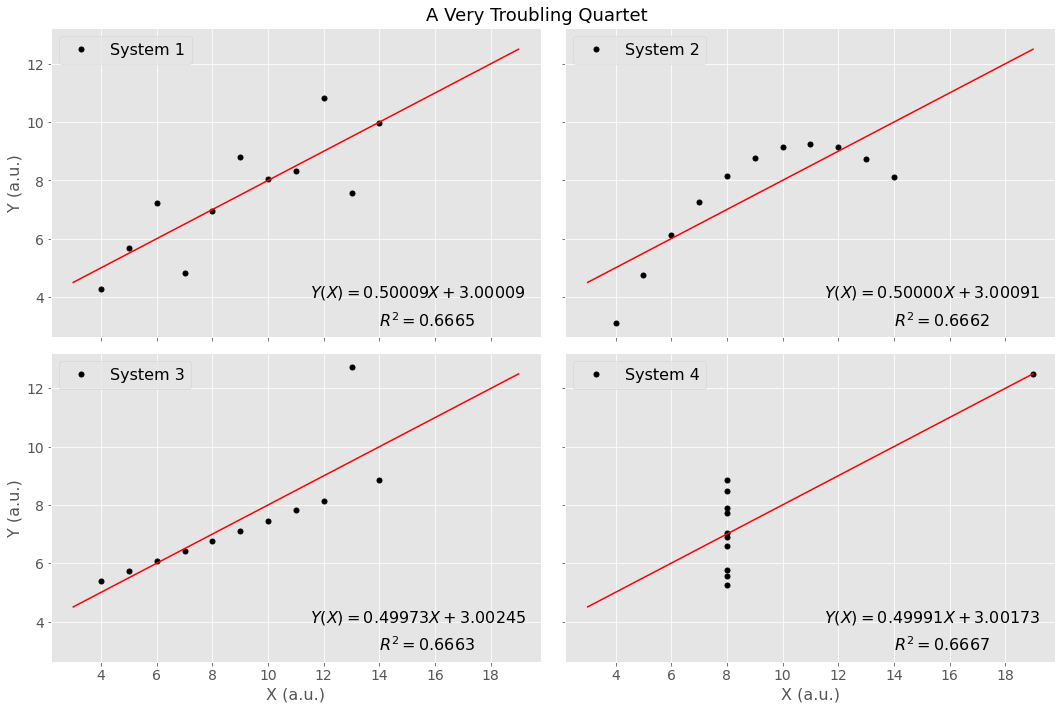

In [5]:
fig = plt.figure(1, figsize=(15.0, 10.0))
plt.subplots_adjust(top=0.95, left=0.05, \
                    bottom=0.07, right=0.98, \
                    hspace=0.05, wspace=0.05)
plt.suptitle("A Very Troubling Quartet", fontsize=FONTSIZE+2)

subp = []
for i, df in enumerate(df_all):
    msg1 = r'$Y(X) = {:.5f}X + {:.5f}$'.format(fit_all[i, 0], \
                                               fit_all[i, 1])
    msg2 = r'$R^2 = {:.4f}$'.format(rsqr_all[i])
    
    if i == 0:
        subp.append( plt.subplot(2, 2, i+1) )
    else:
        subp.append( plt.subplot(2, 2, i+1, sharex=subp[0], sharey=subp[0]) )
    plt.plot(df.X, df.Y, 'ok', \
             markersize=MARKERSIZE, label=f'System {i+1}')
    plt.plot(X_FIT, np.polyval(fit_all[i, :], X_FIT), '-r', \
             linewidth=LINEWIDTH)
    plt.text(11.5, 4.0, msg1, fontsize=FONTSIZE)
    plt.text(14.0, 3.0, msg2, fontsize=FONTSIZE)
    plt.legend(loc='best', fontsize=FONTSIZE)
    plt.grid(True)

idx = 0
subp[idx].set_ylabel('Y (a.u.)', fontsize=FONTSIZE)
for each in subp[idx].get_xticklabels():
    each.set_visible(False)
for each in subp[idx].get_yticklabels():
    each.set_fontsize(FONTSIZE-2)

idx = 1
for each in subp[idx].get_xticklabels():
    each.set_visible(False)
for each in subp[idx].get_yticklabels():
    each.set_visible(False)

idx = 2
subp[idx].set_xlabel('X (a.u.)', fontsize=FONTSIZE)
subp[idx].set_ylabel('Y (a.u.)', fontsize=FONTSIZE)
for each in subp[idx].get_xticklabels():
    each.set_fontsize(FONTSIZE-2)
for each in subp[idx].get_yticklabels():
    each.set_fontsize(FONTSIZE-2)

idx = 3
subp[idx].set_xlabel('X (a.u.)', fontsize=FONTSIZE)
for each in subp[idx].get_xticklabels():
    each.set_fontsize(FONTSIZE-2)
for each in subp[idx].get_yticklabels():
    each.set_visible(False)

#####----- WRITE FILE TO ARTICLE FOLDER!
fig.savefig(FNAME_FIG_TO_PUBLISH)

In a paper notebook, I could just draw on the graphic and annotate it easily.  In a notebook, I need to, for example, use words to point out the possible outlier in system 3 at X ~= 13 rather than just circle it.  Maybe there's a better way...

## Quick & Dirty Data Exploration

[-0.12671329  2.78083916 -5.99573427]
0     0.001329
1     0.001329
2     0.000629
3    -0.001958
4     0.001189
5     0.000210
6    -0.002378
7     0.000210
8    -0.002378
9     0.001189
10    0.000629
Name: Y, dtype: float64


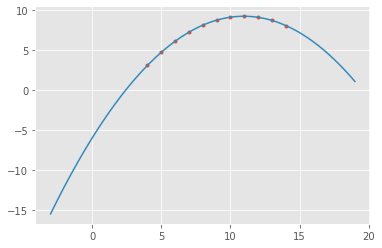

In [6]:
X = df_all[1].X
Y = df_all[1].Y

fit = np.polyfit(X, Y, deg=2)
print(fit)
print(np.polyval(fit, X) - Y)

x_fit_3 = np.linspace(-3.0, 19.0, 1000)
y_fit_3 = np.polyval(fit, x_fit_3)

plt.figure(2, figsize=(6.0, 4.0))
plt.plot(X, Y, '.')
_ = plt.plot(x_fit_3, y_fit_3, '-')

Empirically the systems appears to be characterized by second-degree polynomial.  __Theoretical motivation for this model?!__

In [7]:
print()
print(f'Execution terminated at {dt.datetime.utcnow()} UTC')


Execution terminated at 2022-07-29 15:50:19.893906 UTC
